# XgBoost Regression on the Collected Data

In this Jupyter notebook we will be applying the XgBoost Regression on the data that we have extracted (Real_Combine.csv) and try to make predictions for the AQI (PM 2.5) based on different factors :

- T	:   Average temperature (°C)
- TM:	Maximum temperature (°C)
- Tm:	Minimum temperature (°C)
- SLP:	Atmospheric pressure at sea level (hPa)
- H	:   Average relative humidity (%)
- VV:	Average visibility (Km)
- V :   Average wind speed (Km/h)
- VM:	Maximum sustained wind speed (Km/h)

## Importing the important libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import xgboost as xgb
from sklearn import metrics 

## Reading the Dataset

In [2]:
df = pd.read_csv('Data\Real-Data\Real_Combine.csv')

In [3]:
# Visualizing the data
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,14.9,21.6,8.8,1017.4,76.0,0.8,0.9,7.6,172.750000
1,14.7,21.6,10.2,1018.1,97.0,0.6,3.1,9.4,146.791667
2,15.0,16.8,13.6,1017.5,94.0,0.5,0.9,7.6,113.875000
3,9.8,17.6,6.4,1016.6,90.0,0.5,3.9,11.1,227.000000
4,10.1,14.5,7.2,1019.2,90.0,0.3,3.3,7.6,231.250000
...,...,...,...,...,...,...,...,...,...
1076,13.9,23.2,5.5,1017.2,69.0,1.0,4.1,13.0,375.791667
1077,13.0,23.1,4.6,1017.0,74.0,1.1,3.5,9.4,223.250000
1078,13.3,22.4,4.4,1016.5,72.0,1.1,5.2,9.4,248.958333
1079,15.0,21.9,6.0,1013.5,68.0,1.0,5.4,11.1,441.416667


Here we can see that we are having 1081 rows and 9 columns (features). Where T, TM, Tm, SLP, H, VV, V, VM are the independent features and PM 2.5 is the dependent feature.

In [4]:
# checking for null values in Data

df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    3
dtype: int64

Here we can see that we are having 3 null values in the Target feature that needs to handled.

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


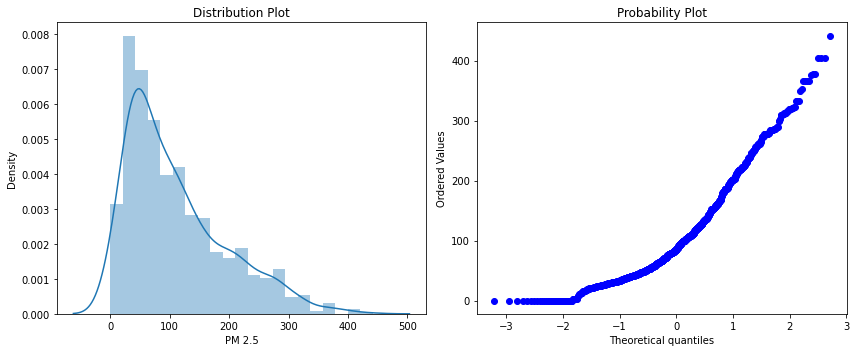

In [5]:
# observing the distribution of 'PM 2.5' target value

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['PM 2.5'])
plt.title('Distribution Plot')

plt.subplot(1,2,2)
stats.probplot(df['PM 2.5'], dist="norm", plot=plt)
plt.tight_layout()

It can be seen that the target variable 'PM 2.5' have right skewed value, we can handle the null values by two ways 
- dropping the records as there are only three null records
- replacing the null values with the median value

In [6]:
# replacing the null values with the median value

df['PM 2.5'].fillna(df['PM 2.5'].median(), inplace = True)

In [7]:
# checking if the null values are replaced successfully

df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

## Observing the correlations between the features

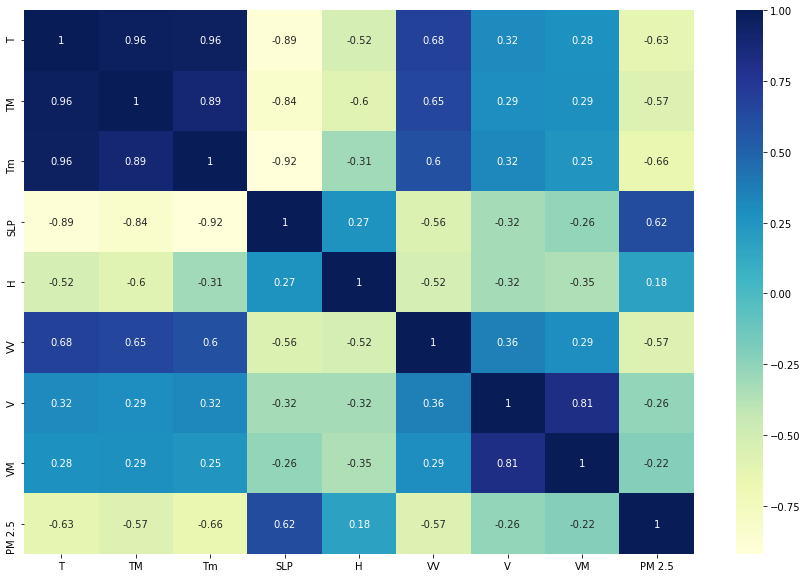

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the heatmap we can easily identify the correlations between the features and understand their importance in predicting the values for 'PM 2.5'.

### Dividing the data into dependent and independent features

In [9]:
# independent features
x = df.iloc[:,:-1]

# dependent features
y = df.iloc[:,-1]

In [10]:
print(x.shape,' ',y.shape)

(1081, 8)   (1081,)


### Understanding the feature importance

In [11]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [12]:
# identifying the importance of features

model.feature_importances_

array([0.22336733, 0.07771642, 0.20785934, 0.16952151, 0.07286078,
       0.14403608, 0.05344418, 0.05119437])

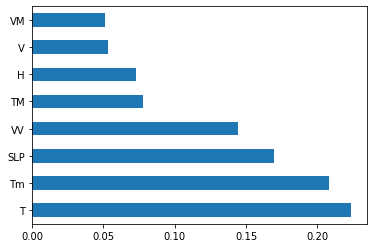

In [13]:
# visualizing the feature importance graphically

feature_importance = pd.Series(model.feature_importances_, index = x.columns)
feature_importance.nlargest(10).plot(kind = 'barh')
plt.show()

## Train Test Split

In [14]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape,' ',y_train.shape)
print(x_test.shape,' ',y_test.shape)

(864, 8)   (864,)
(217, 8)   (217,)


## Creating the XgBoost Regression Model

In [15]:
# creating model

xgbregressor = xgb.XGBRegressor()
xgbregressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
# coefficient of determination of the prediction

print('Model Score : {} for train data'.format(xgbregressor.score(x_train, y_train)))

Model Score : 0.9977826516822755 for train data


In [17]:
# coefficient of determination of the prediction

print('Model Score : {} for test data'.format(xgbregressor.score(x_test, y_test)))

Model Score : 0.358900772658061 for test data


As we have directly fit the model without any Hyperparameter tuning which caused a overfitting condition, thus the accuracy for Train data is very high as compaired to the Test data.

In [18]:
# cross validating the model

score = cross_val_score(xgbregressor, x, y, cv = 5)

In [19]:
# mean accuracy obtained on cross validation

score.mean()

0.3706703502596654

In [20]:
# making predictions for test data

pred = xgbregressor.predict(x_test)

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

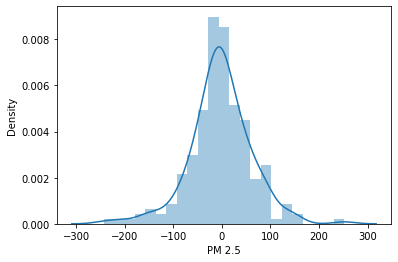

In [21]:
# observing the 'y_test - pred' graphically

sns.distplot(y_test - pred)

## Hyperparameter Tuning for XgBoost Regressor

In [22]:
# parameters

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample = [0.7, 0.6, 0.8]
min_child_weight = [3, 4, 5, 6, 7]

In [23]:
# creating a dictionary for parameters to be optimised
random_grid = {
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight
}

In [24]:
# creating the base model

xgbregressor = xgb.XGBRegressor()

In [25]:
# optimising the model by RandomizedSearchCV

xgb_random = RandomizedSearchCV(estimator = xgbregressor, param_distributions = random_grid, scoring = 'neg_mean_squared_error',
                          n_iter = 100, cv = 5, n_jobs = -1, verbose = 2)

In [26]:
# fitting the best model obtained on Train data

xgb_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [27]:
# obtaining the best parameters and best score
print(xgb_random.best_params_)
print(xgb_random.best_score_)

{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': '0.05'}
-3437.5882735138875


In [28]:
# making predictions for test data with the optimised model

pred = xgb_random.predict(x_test)

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

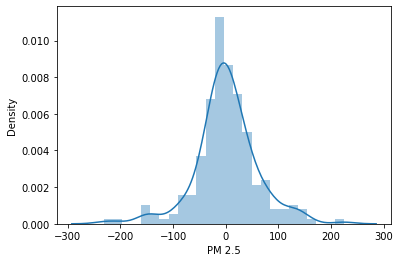

In [29]:
# observing the 'y_test - pred' graphically for the optimised model

sns.distplot(y_test - pred)

## Evaluation Metrics

In [30]:
# observing 'MAE', 'MSE', 'RMSE'

print('MAE : ', metrics.mean_absolute_error(y_test,pred))
print('MSE : ', metrics.mean_squared_error(y_test,pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE :  41.56939954274261
MSE :  3556.4640110322994
RMSE :  59.63609654422646
